In [1]:
#importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [2]:
#cargar dataset
df = pd.read_csv("datasets/beisbol.csv")
#mostrar las primeras lineas
df.head()


,Unnamed: 0,equipos,bateos,runs
0,0,Texas,5659,855
1,1,Boston,5710,875
2,2,Detroit,5563,787
3,3,Kansas,5672,730
4,4,St.,5532,762


In [3]:
#exploracion
print("Shape:", df.shape)
display(df.info())
display(df.describe().T)

# Mostrar las columnas para decidir features
print("Columnas:", df.columns.tolist())

Shape: (30, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30 non-null     int64 
 1   equipos     30 non-null     object
 2   bateos      30 non-null     int64 
 3   runs        30 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


None

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,30.0,14.5,8.803408,0.0,7.25,14.5,21.75,29.0
bateos,30.0,5523.5,79.873067,5417.0,5448.25,5515.5,5575.00,5710.0
runs,30.0,693.6,82.479088,556.0,629.00,705.5,734.00,875.0


Columnas: ['Unnamed: 0', 'equipos', 'bateos', 'runs']


In [4]:
#Preparación X, y y split
FEATURES = ['bateos']   
TARGET = 'runs'

X = df[FEATURES].copy()
y = df[TARGET].copy()

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (22, 1) Test shape: (8, 1)


In [6]:
#Baseline: Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_base = rf.predict(X_test)

def metrics(y_true, y_pred):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
       'RMSE': mean_squared_error(y_true, y_pred) ** 0.5,
        'R2': r2_score(y_true, y_pred)
    }

metrics_base = metrics(y_test, y_pred_base)
metrics_base


{'MAE': 53.73506250000001,
 'RMSE': 58.62699982424789,
 'R2': -0.0028996395418581233}

In [7]:
#optimizacion
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, None],
    'min_samples_split': [2, 4, 6]
}

grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

grid.fit(X_train, y_train)
print("Mejores parámetros:", grid.best_params_)
best_rf = grid.best_estimator_


Mejores parámetros: {'max_depth': 2, 'min_samples_split': 6, 'n_estimators': 200}


In [8]:
#evaluacion del modelo 
y_pred_best = best_rf.predict(X_test)
metrics_best = metrics(y_test, y_pred_best)
metrics_base, metrics_best


({'MAE': 53.73506250000001,
  'RMSE': 58.62699982424789,
  'R2': -0.0028996395418581233},
 {'MAE': 52.00031214741152,
  'RMSE': 63.88917146502373,
  'R2': -0.19101339815437646})

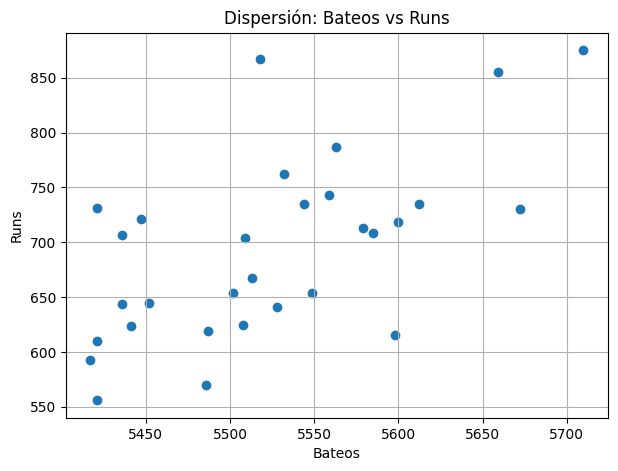

In [9]:
#Gráfica de dispersión de bateos vs runs
plt.figure(figsize=(7,5))
plt.scatter(df['bateos'], df['runs'])
plt.xlabel('Bateos')
plt.ylabel('Runs')
plt.title('Dispersión: Bateos vs Runs')
plt.grid(True)
plt.show()


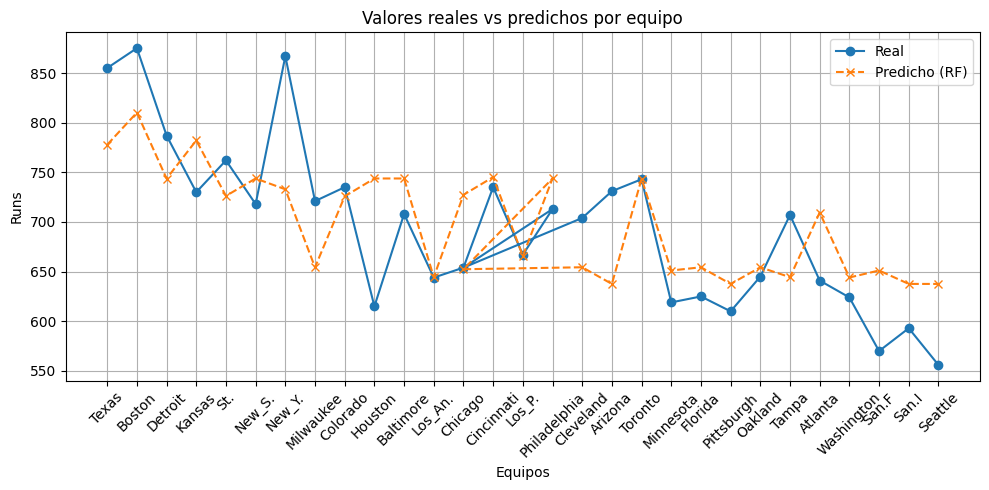

In [13]:
#Gráfica comparativa real vs predicho
y_pred_full_best = best_rf.predict(X)

plt.figure(figsize=(10,5))
plt.plot(df['equipos'], df['runs'], marker='o', label='Real')
plt.plot(df['equipos'], y_pred_full_best, marker='x', linestyle='--', label='Predicho (RF)')
plt.xticks(rotation=45)
plt.xlabel('Equipos')
plt.ylabel('Runs')
plt.title('Valores reales vs predichos por equipo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

